In [142]:
set.seed(123)     
library(glmnet)   
library(dplyr)  
library(ggplot2)

In [204]:
resid

3.143247
4.298952
7.492360
13.853059
16.103341
20.985762
6.837349
8.049237
15.151442
23.707231
29.084956



Call:
lm(formula = y3 ~ x1 + x2 + x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.80201 -0.47208  0.03824  0.71808  2.08664 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4851     1.4539  -1.021  0.32437    
x1            1.2931     0.4073   3.175  0.00675 ** 
x2            1.3509     0.4073   3.317  0.00509 ** 
x3            0.9494     0.1046   9.078 3.05e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.251 on 14 degrees of freedom
Multiple R-squared:  0.9927,	Adjusted R-squared:  0.9911 
F-statistic: 634.4 on 3 and 14 DF,  p-value: 3.466e-15



Call:
lm(formula = y3 ~ x1 + x2 + x3 + x4)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.82616 -0.50083 -0.02242  0.81191  1.82574 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.41877    1.49943  -0.946  0.36130   
x1           1.27419    0.42009   3.033  0.00961 **
x2           1.17388    0.54266   2.163  0.04974 * 
x3           1.06947    0.25781   4.148  0.00114 **
x4          -0.01614    0.03150  -0.512  0.61701   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.285 on 13 degrees of freedom
Multiple R-squared:  0.9928,	Adjusted R-squared:  0.9906 
F-statistic: 450.8 on 4 and 13 DF,  p-value: 8.477e-14


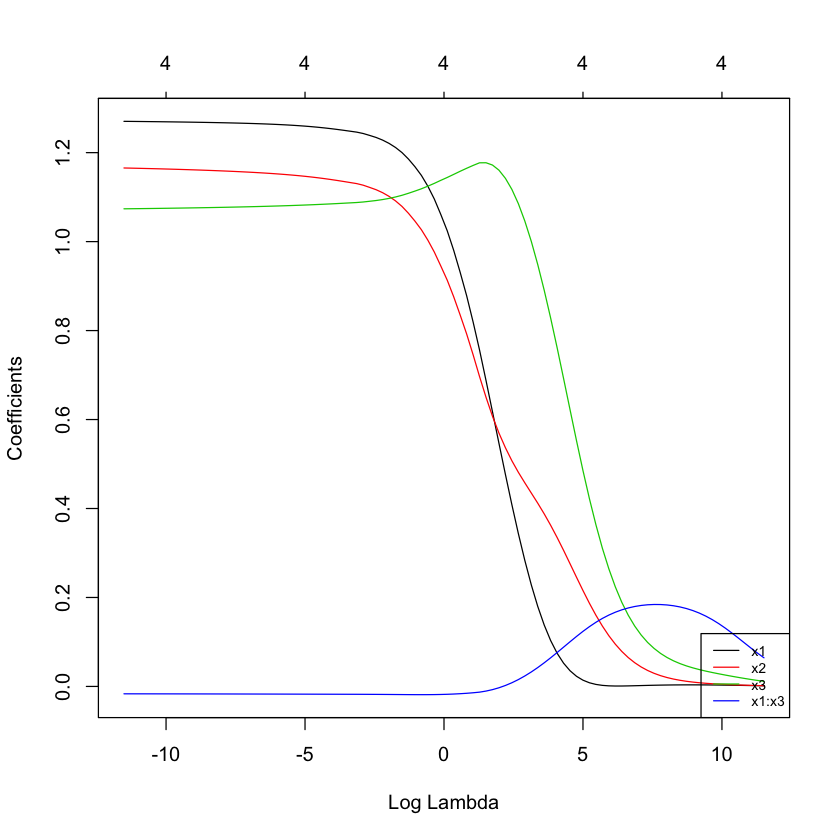

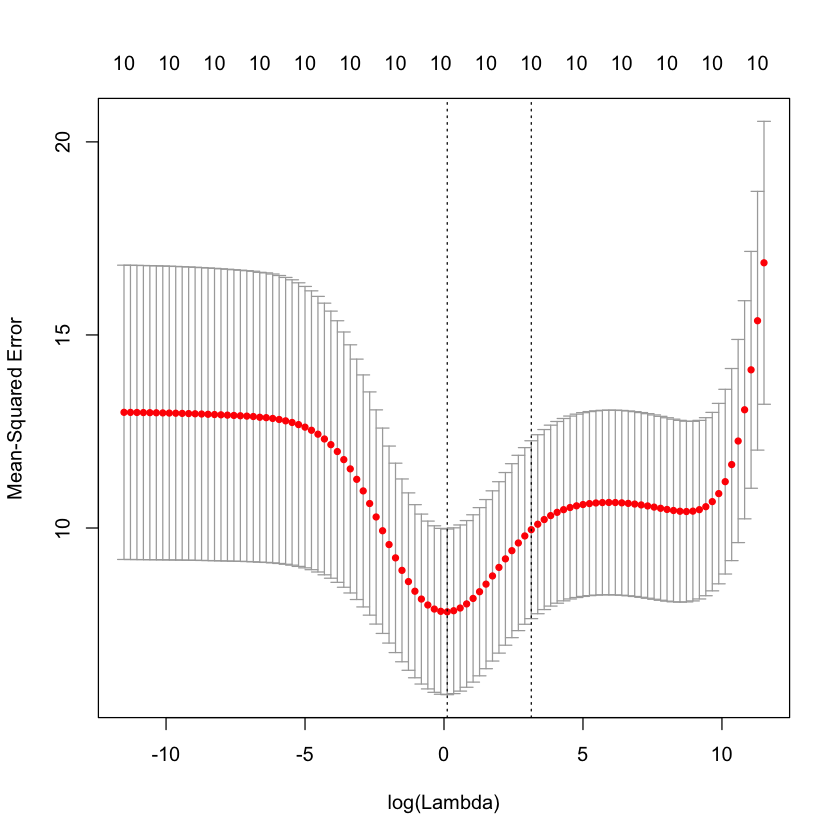

In [219]:
set.seed(123)
x1=rep(1:6,3)
x2=rep(1:6,each=3)
x3=x1*x2
x4=1*x1*x3
y1=x1+x2+rnorm(18)
y2=x3+rnorm(18)
y3=y1+y2

my.fit=lm( y3 ~ x1 + x2 + x3 )
summary(my.fit)

my.fit=lm( y3 ~ x1 + x2 + x3 + x4)
summary(my.fit)

Xall <- cbind(x1,x2,x3,x1*x3)#,x2*x3,x1*x2*x3)
colnamestouse <- c("x1","x2","x3","x1:x3")#,"x2:x3","x1:x2:x3")
colnames(Xall) <- colnamestouse
  
# Sweep lambda from 10^-5 to 10^5 in 100 steps
lambdas_to_try <- 10^seq(-5,5, length.out = 100) 
  
# plot the coefficients
reg_fit <- glmnet(Xall, y3, alpha = 0,  
                      lambda = lambdas_to_try, 
                      standardize = FALSE) 

plot(reg_fit, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6,  
       legend = colnames(Xall), cex = .7)

# Setting alpha = 0 implements ridge regression 
ridge_cv <- cv.glmnet(X, y, alpha = 0,  
                      lambda = lambdas_to_try, 
                      standardize = FALSE, nfolds = 10) 
  
# Plot cross-validation results 
plot(ridge_cv) 

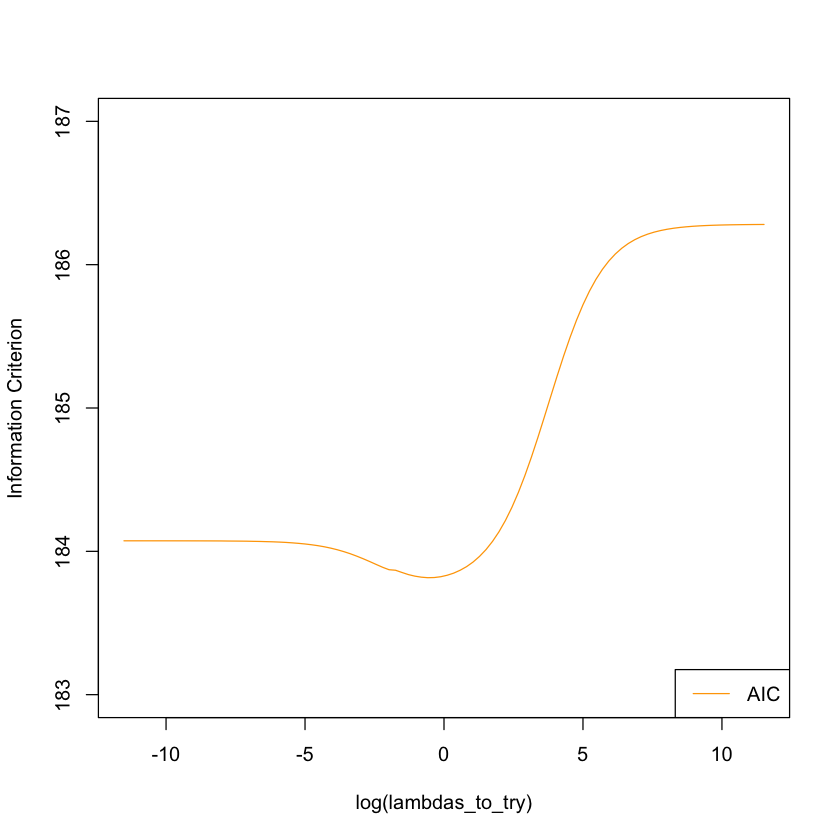

In [217]:
# selecting lamba based on the information 
X_scaled <- scale(Xall) 
aic <- c() 
bic <- c() 
for (lambda in seq(lambdas_to_try))  
{ 
  # Run model 
  model <- glmnet(Xall, y3, alpha = 0, 
                  lambda = lambdas_to_try[lambda],  
                  standardize = TRUE) 
    
  # Extract coefficients and residuals (remove first  
  # row for the intercept) 
  betas <- as.vector((as.matrix(coef(model))[-1, ])) 
  resid <- y3 - (X_scaled %*% betas) 
    
  # Compute hat-matrix and degrees of freedom 
  ld <- lambdas_to_try[lambda] * diag(ncol(X_scaled)) 
  H <- X_scaled %*% solve(t(X_scaled) %*% X_scaled + ld)  %*% t(X_scaled) 
  df <- 10
    
  # Compute information criteria 
  aic[lambda] <- nrow(X_scaled) * log(t(resid) %*% resid) + 2 * df 
  bic[lambda] <- log(t(resid) %*% resid)
} 
  
# Plot information criteria against tried values of lambdas 
plot(log(lambdas_to_try), aic, col = "orange", type = "l", 
     ylim = c(183, 187), ylab = "Information Criterion") 
legend("bottomright", lwd = 1, col = c("orange", "skyblue3"),  
       legend = c("AIC")) 
  
# Optimal lambdas according to both criteria 
lambda_aic <- lambdas_to_try[which.min(aic)] 
lambda_bic <- lambdas_to_try[which.min(bic)] 
  

In [218]:
bic[1:10]

[1] 9.115191 9.115190 9.115190 9.115189 9.115188 9.115187 9.115186 9.115184
 [9] 9.115182 9.115179


Call:
lm(formula = y3 ~ x1 + x2 + x3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.280201 -0.047208  0.003824  0.071808  0.208664 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.14851    0.14539  -1.021    0.324    
x1           1.02931    0.04073  25.272 4.42e-13 ***
x2           1.03509    0.04073  25.414 4.09e-13 ***
x3           0.99494    0.01046  95.135  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1251 on 14 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 6.035e+04 on 3 and 14 DF,  p-value: < 2.2e-16



Call:
lm(formula = y3 ~ x1 + x2 + x3 + x1:x3 + x2:x3 + x1:x2:x3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.179393 -0.040053 -0.005516  0.055505  0.139321 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.161960   0.151923   1.066  0.30923    
x1           0.976864   0.058500  16.699 3.67e-09 ***
x2           0.961167   0.045784  20.993 3.18e-10 ***
x3           0.887206   0.042264  20.992 3.18e-10 ***
x1:x3        0.022539   0.007162   3.147  0.00929 ** 
x2:x3        0.025864   0.007269   3.558  0.00449 ** 
x1:x2:x3    -0.004840   0.001359  -3.561  0.00446 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09423 on 11 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:  0.9999 
F-statistic: 5.316e+04 on 6 and 11 DF,  p-value: < 2.2e-16


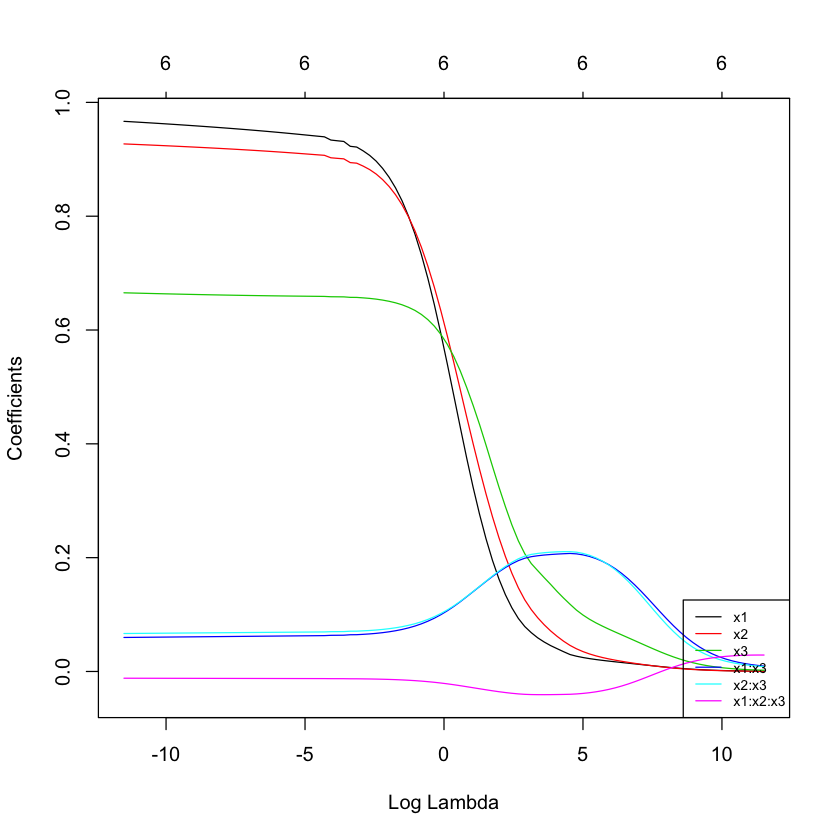

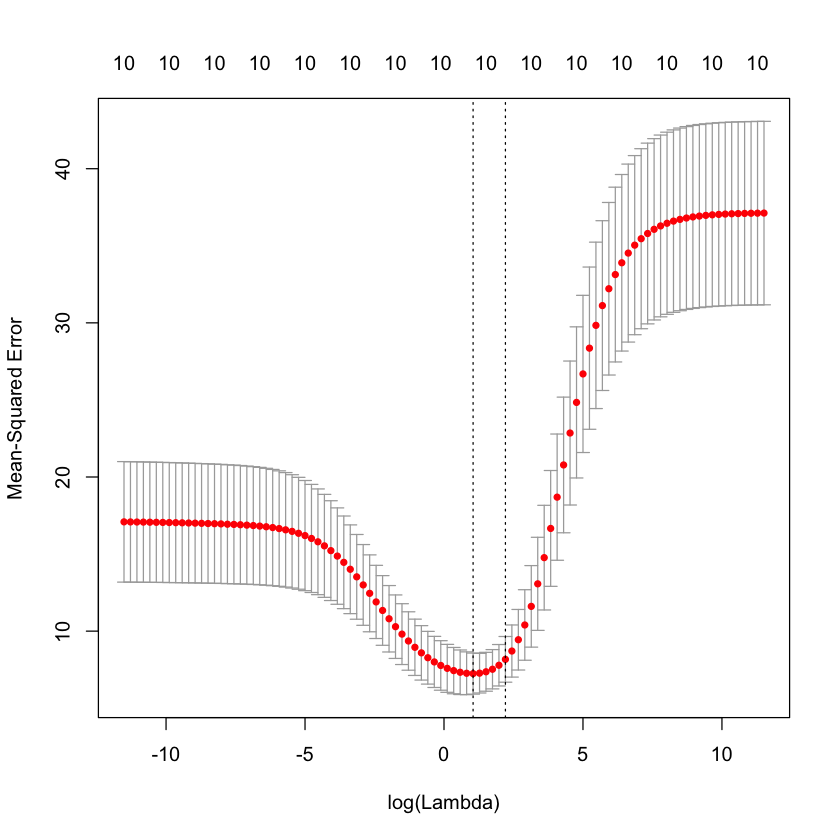

In [179]:
set.seed(123)
x1=rep(1:6,3)
x2=rep(1:6,each=3)
x3=x1*x2
y1=x1+x2+.1*rnorm(18)
y2=x3+.1*rnorm(18)
y3=y1+y2

my.fit=lm( y3 ~ x1 + x2 + x3 )
summary(my.fit)

my.fit=lm( y3 ~ x1 + x2 + x3 + x1:x3 + x2:x3 + x1:x2:x3)
summary(my.fit)

Xall <- cbind(x1,x2,x3,x1*x3,x2*x3,x1*x2*x3)
colnamestouse <- c("x1","x2","x3","x1:x3","x2:x3","x1:x2:x3")#,"x2:x3","x1:x2:x3")
colnames(Xall) <- colnamestouse
  
# Perform 10-fold cross-validation to select lambda 
lambdas_to_try <- 10^seq(-5,5, length.out = 100) 
  
# plot the coefficients
ridge_cv <- glmnet(Xall, y3, alpha = 0,  
                      lambda = lambdas_to_try, 
                      standardize = FALSE) 

plot(ridge_cv, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6,  
       legend = colnames(Xall), cex = .7)

# Setting alpha = 0 implements ridge regression 
ridge_cv <- cv.glmnet(X, y, alpha = 0,  
                      lambda = lambdas_to_try, 
                      standardize = TRUE, nfolds = 5) 
  
# Plot cross-validation results 
plot(ridge_cv) 

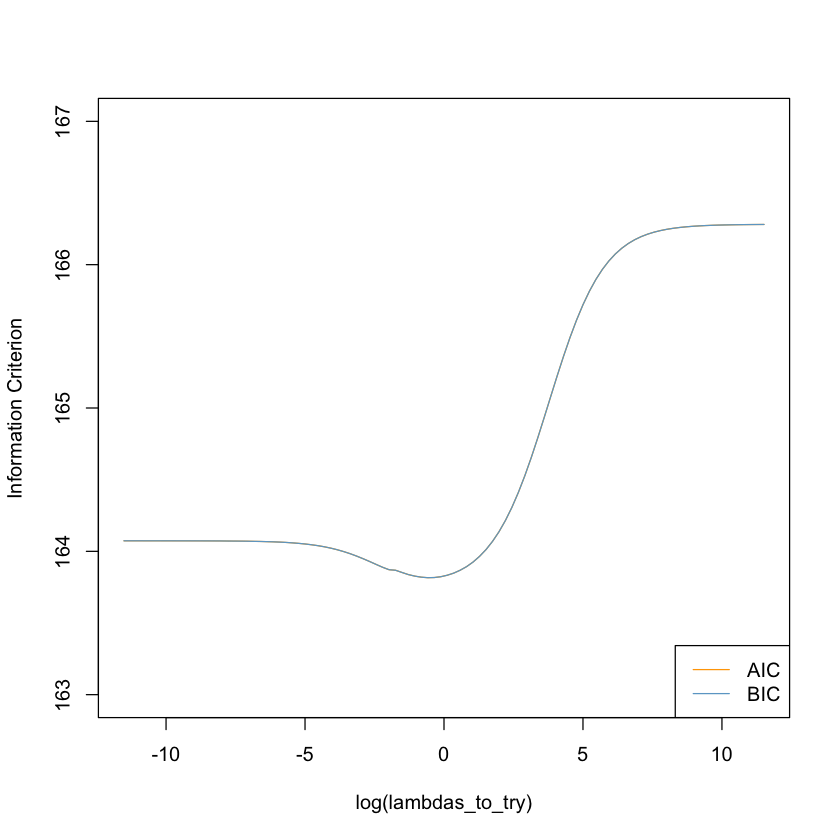

In [182]:
# selecting lamba based on the information 
X_scaled <- scale(Xall) 
aic <- c() 
bic <- c() 
for (lambda in seq(lambdas_to_try))  
{ 
  # Run model 
  model <- glmnet(Xall, y3, alpha = 0, 
                  lambda = lambdas_to_try[lambda],  
                  standardize = TRUE) 
    
  # Extract coefficients and residuals (remove first  
  # row for the intercept) 
  betas <- as.vector((as.matrix(coef(model))[-1, ])) 
  resid <- y3 - (X_scaled %*% betas) 
    
  # Compute hat-matrix and degrees of freedom 
  ld <- lambdas_to_try[lambda] * diag(ncol(X_scaled)) 
  H <- X_scaled %*% solve(t(X_scaled) %*% X_scaled + ld)  %*% t(X_scaled) 
  df <- 10
    
  # Compute information criteria 
  aic[lambda] <- nrow(X_scaled) * log(t(resid) %*% resid)  
                                                   + 2 * df 
  bic[lambda] <- nrow(X_scaled) * log(t(resid) %*% resid) 
                           + 2 * df * log(nrow(X_scaled)) 
} 
  
# Plot information criteria against tried values of lambdas 
plot(log(lambdas_to_try), aic, col = "orange", type = "l", 
     ylim = c(163, 167), ylab = "Information Criterion") 
lines(log(lambdas_to_try), bic, col = "skyblue3") 
legend("bottomright", lwd = 1, col = c("orange", "skyblue3"),  
       legend = c("AIC", "BIC")) 
  
# Optimal lambdas according to both criteria 
lambda_aic <- lambdas_to_try[which.min(aic)] 
lambda_bic <- lambdas_to_try[which.min(bic)] 
  

In [170]:
bic[1]

[1] 164.0734

# Other stuff

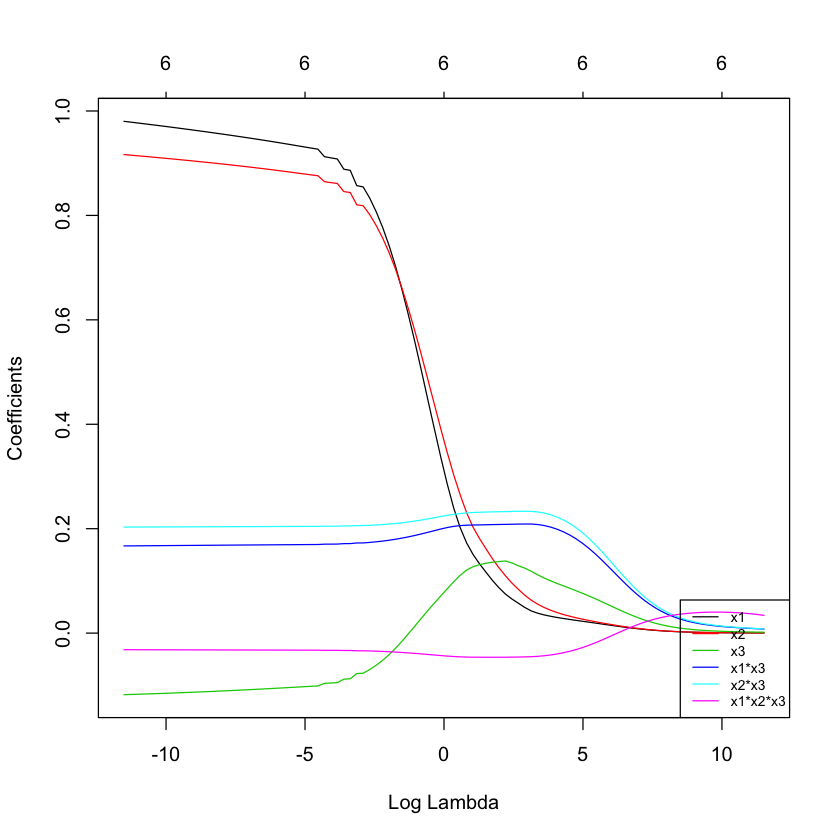

In [124]:
Xall <- cbind(x1,x2,x3,x1*x3,x2*x3,x1*x2*x3)
colnamestouse <- c("x1","x2","x3","x1*x3","x2*x3","x1*x2*x3")
colnames(Xall) <- colnamestouse
  
# Perform 10-fold cross-validation to select lambda 
lambdas_to_try <- 10^seq(-5,5, length.out = 100) 
  
# Setting alpha = 0 implements ridge regression 
ridge_cv <- glmnet(Xall, y3, alpha = 0,  
                      lambda = lambdas_to_try, 
                      standardize = FALSE) 

plot(ridge_cv, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6,  
       legend = colnames(Xall), cex = .7)


Call:
lm(formula = y3 ~ x1 + x2 + x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09638 -0.60832  0.05186  0.66226  1.29114 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   1.6687     1.3994   1.192   0.2582  
x1            0.4081     0.4718   0.865   0.4055  
x2            0.6820     0.4179   1.632   0.1310  
x3            1.7727     0.9548   1.857   0.0903 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.046 on 11 degrees of freedom
Multiple R-squared:  0.9183,	Adjusted R-squared:  0.896 
F-statistic: 41.19 on 3 and 11 DF,  p-value: 2.842e-06



Call:
lm(formula = y3 ~ x1 + x2 + x3 + x1:x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.05467 -0.68081  0.02251  0.67292  1.29557 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   1.6027     1.5304   1.047    0.320
x1            0.4300     0.5154   0.834    0.424
x2            0.7996     0.8965   0.892    0.393
x3            3.2822    10.0913   0.325    0.752
x1:x2        -0.2319     1.5425  -0.150    0.883

Residual standard error: 1.095 on 10 degrees of freedom
Multiple R-squared:  0.9184,	Adjusted R-squared:  0.8858 
F-statistic: 28.15 on 4 and 10 DF,  p-value: 2.018e-05


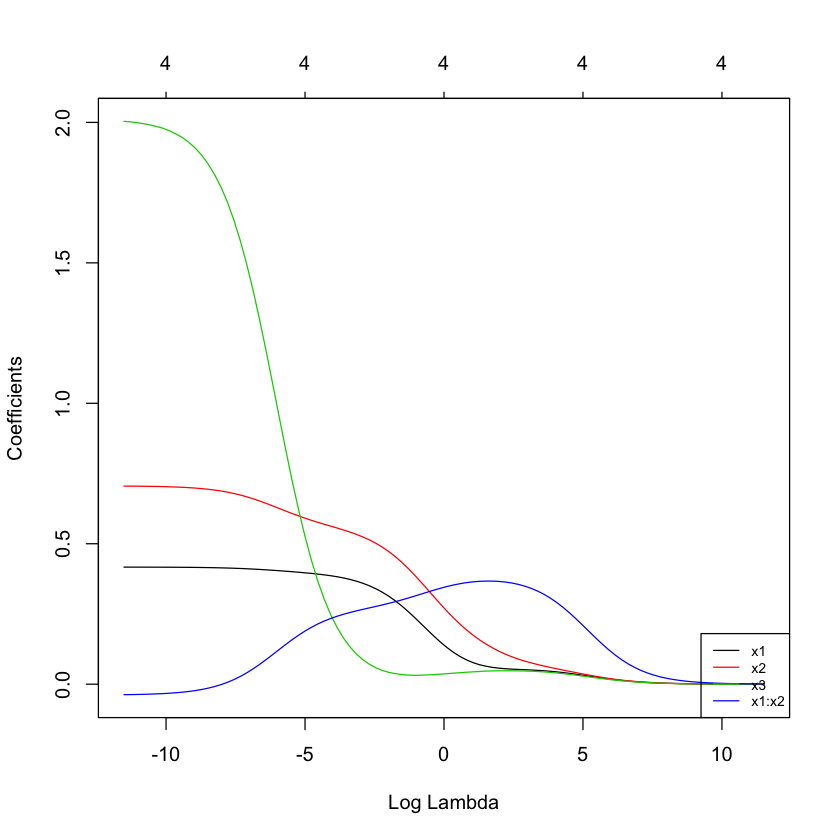

In [132]:
set.seed(123)
x1=rep(1:5,3)
x2=rep(1:5,each=3)
x3=x1^1.2*x2*0.1
y1=x1+x2+rnorm(15)
y2=x3+rnorm(15)
y3=y1+y2

my.fit=lm( y3 ~ x1 + x2 + x3 )
summary(my.fit)

my.fit=lm( y3 ~ x1 + x2 + x3 + x1:x2 ) #+ x2:x3 + x1:x2:x3)
summary(my.fit)

Xall <- cbind(x1,x2,x3,x1*x2)
colnamestouse <- c("x1","x2","x3","x1:x2")
colnames(Xall) <- colnamestouse
  
# Perform 10-fold cross-validation to select lambda 
lambdas_to_try <- 10^seq(-5,5, length.out = 100) 
  
# Setting alpha = 0 implements ridge regression 
ridge_cv <- glmnet(Xall, y3, alpha = 0,  
                      lambda = lambdas_to_try, 
                      standardize = FALSE) 

plot(ridge_cv, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6,  
       legend = colnames(Xall), cex = .7)

In [123]:
y3

[1]  4.226437  5.267673  6.592091 14.771864 16.656496  5.647241 11.242941
 [8] 12.708934 17.584256 27.929299  8.537388 15.197601 23.554145 27.972546
[15] 35.697974

## Attempt at more predictors

In [106]:
set.seed(123)
x1=rep(1:5,3)
x2=rep(1:5,each=3)
x3=x1^1.2*x2
y1=x1+x2+rnorm(15)
y2=x3+rnorm(15)
y3=y1+y2

my.fit=lm( y3 ~ x1 + x2 + x3 )
summary(my.fit)

my.fit=lm( y3 ~ x1 + x2 + x3 + x1:x2 + x1:x3 + x2:x3 + x1:x2:x3)
summary(my.fit)




Call:
lm(formula = y3 ~ x1 + x2 + x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09638 -0.60832  0.05186  0.66226  1.29114 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.66874    1.39942   1.192    0.258    
x1           0.40807    0.47176   0.865    0.406    
x2           0.68202    0.41793   1.632    0.131    
x3           1.07727    0.09548  11.283 2.19e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.046 on 11 degrees of freedom
Multiple R-squared:  0.9944,	Adjusted R-squared:  0.9929 
F-statistic: 655.4 on 3 and 11 DF,  p-value: 1.119e-12



Call:
lm(formula = y3 ~ x1 + x2 + x3 + x1:x2 + x1:x3 + x2:x3 + x1:x2:x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26444 -0.43449  0.09818  0.36024  1.81979 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)   1.69471    1.98999   0.852    0.423
x1            1.09165    0.95410   1.144    0.290
x2           -2.30289    2.17546  -1.059    0.325
x3          -12.43894    7.94946  -1.565    0.162
x1:x2        15.15345    9.47545   1.599    0.154
x1:x3         0.53997    0.29835   1.810    0.113
x2:x3         0.17250    0.12108   1.425    0.197
x1:x2:x3     -0.02736    0.02637  -1.037    0.334

Residual standard error: 1.021 on 7 degrees of freedom
Multiple R-squared:  0.9966,	Adjusted R-squared:  0.9933 
F-statistic: 295.5 on 7 and 7 DF,  p-value: 4.125e-08


In [87]:
y3

[1]  4.226437  5.565070  7.329284 17.327928 20.453793  5.647241 12.135131
 [8] 14.920513 21.418351 35.523892  8.537388 16.387188 27.240109 34.362704
[15] 45.191215

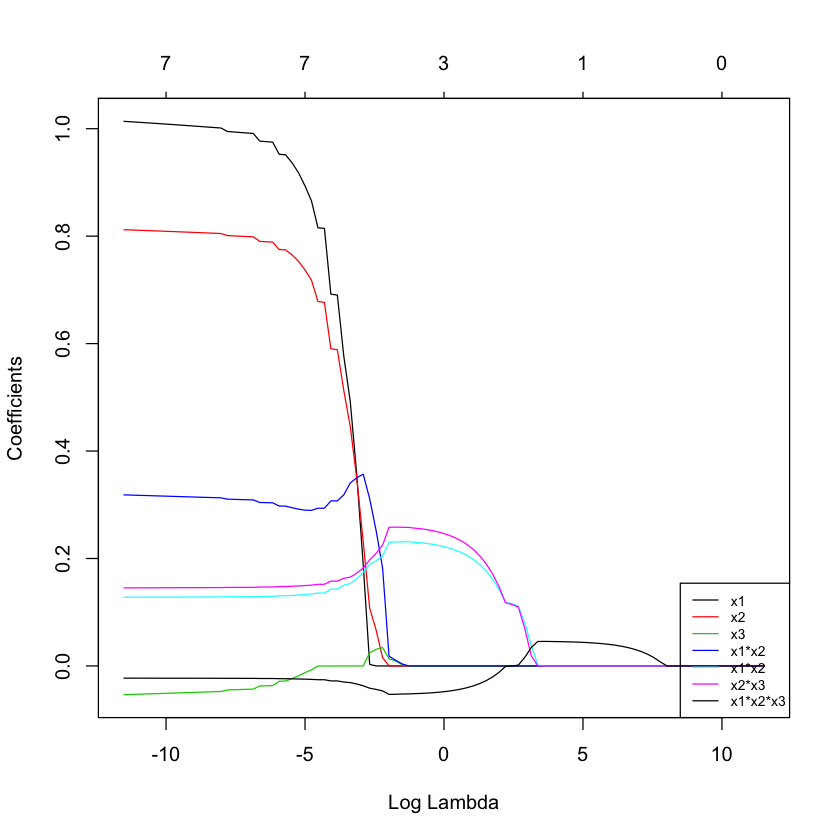

In [112]:
Xall <- cbind(x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3)
colnamestouse <- c("x1","x2","x3","x1*x2","x1*x3","x2*x3","x1*x2*x3")
colnames(Xall) <- colnamestouse
  
# Perform 10-fold cross-validation to select lambda 
lambdas_to_try <- 10^seq(-5,5, length.out = 100) 
  
# Setting alpha = 0 implements ridge regression 
ridge_cv <- glmnet(Xall, y3, alpha = 1,  
                      lambda = lambdas_to_try, 
                      standardize = FALSE) 

plot(ridge_cv, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6,  
       legend = colnames(combinedmatrix), cex = .7)

In [111]:
Xall

x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
1,1,1.000000,1,1.000000,1.000000,1.000000
2,1,2.297397,2,4.594793,2.297397,4.594793
3,1,3.737193,3,11.211578,3.737193,11.211578
4,2,10.556063,8,42.224253,21.112127,84.448506
5,2,13.797297,10,68.986483,27.594593,137.972966
1,2,2.000000,2,2.000000,4.000000,4.000000
2,3,6.892190,6,13.784380,20.676570,41.353141
3,3,11.211578,9,33.634735,33.634735,100.904206
4,3,15.834095,12,63.336380,47.502285,190.009139
5,4,27.594593,20,137.972966,110.378373,551.891865


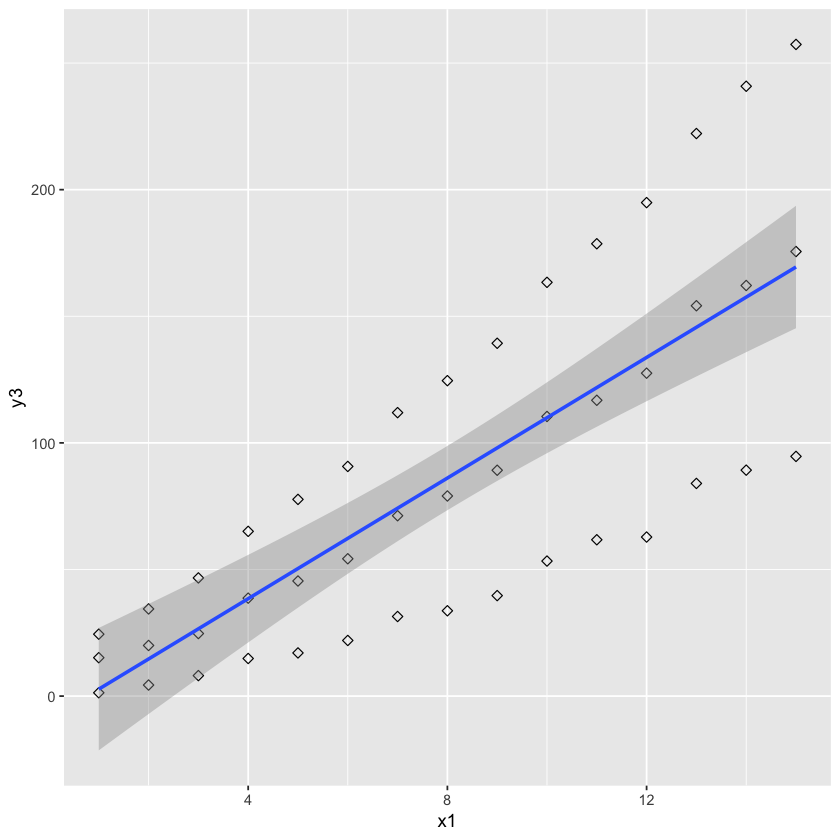

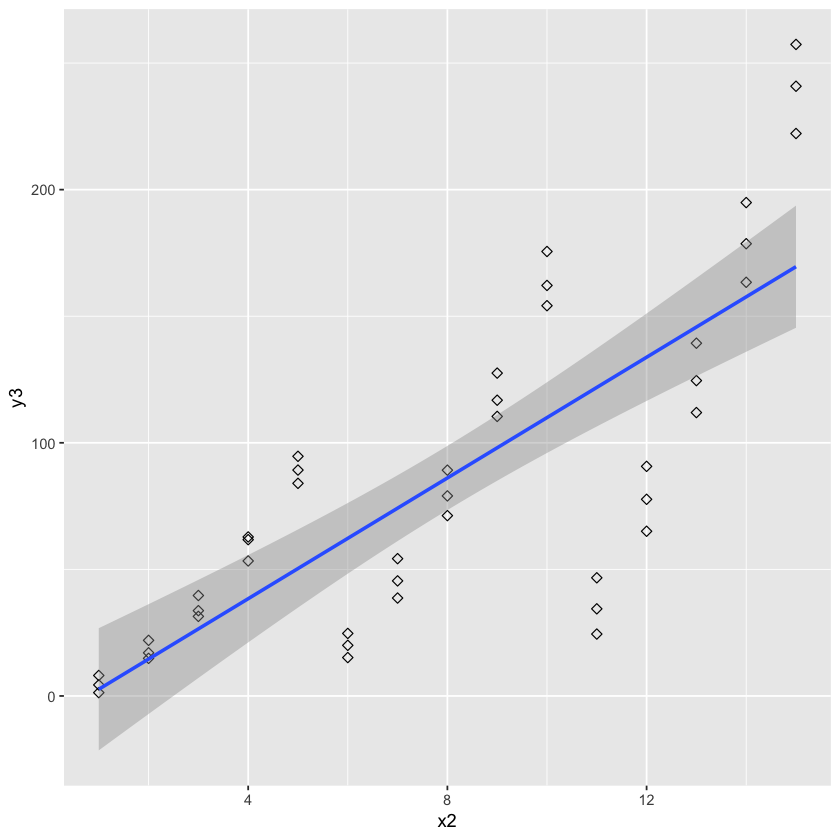

In [159]:
df <- data.frame(x1=x1,x2=x2,y3=y3)
ggplot(df, aes(x=x1, y=y3)) +
  geom_point(size=2, shape=23) +
  geom_smooth(method=lm, se=TRUE)
ggplot(df, aes(x=x2, y=y3)) +
  geom_point(size=2, shape=23) +
  geom_smooth(method=lm, se=TRUE)